In [2]:
# Importing necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import random as rnd

### Dataset description

The dataset contains the sales, orders, quantity, etc of global stores.

'Shipping cost' is considered for the analysis in this assignment

In [3]:
# Importing the dataset suitable for experimentation with Central Limit Theorem
superstore=pd.read_excel('GlobalSuperstore.xlsx')
length=len(superstore)
print(f"This dataset has many records: Length = {len(superstore)}")

This dataset has many records: Length = 51292


In [4]:
# Displaying few records from the dataset
superstore.head()

,category,city,country,customer_id,customer_name,discount,market,order_date,order_id,order_priority,...,region,row_id,sales,segment,ship_date,ship_mode,shipping_cost,state,sub_category,year
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0,US,2018-01-07T00:00:00,CA-2011-130813,3) High,...,West,36624,19,Consumer,2018-01-09T00:00:00,Second Class,4.37,California,Paper,2018.0
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0,US,2018-01-21T00:00:00,CA-2011-148614,2) Medium,...,West,37033,19,Consumer,2018-01-26T00:00:00,Standard Class,0.94,California,Paper,2018.0
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,2018-08-05T00:00:00,CA-2011-118962,2) Medium,...,West,31468,21,Consumer,2018-08-09T00:00:00,Standard Class,1.81,California,Paper,2018.0
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0,US,2018-08-05T00:00:00,CA-2011-118962,2) Medium,...,West,31469,111,Consumer,2018-08-09T00:00:00,Standard Class,4.59,California,Paper,2018.0
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0,US,2018-09-29T00:00:00,CA-2011-146969,3) High,...,West,32440,6,Consumer,2018-10-03T00:00:00,Standard Class,1.32,California,Paper,2018.0


In [5]:
# Calculating population statistics
superstore.describe()

,profit,quantity,row_id,sales,shipping_cost,year
count,51292.000000,51283.000000,51292.000000,51292.000000,51292.000000,51284.000000
mean,28.610171,3.476591,25645.916732,246.489472,26.374861,2019.698405
std,174.337621,2.278795,14806.169327,487.559784,57.295897,12.660925
min,-6599.978000,1.000000,1.000000,0.000000,0.002000,0.000000
25%,0.000000,2.000000,12823.750000,31.000000,2.610000,2019.000000
50%,9.240000,3.000000,25646.500000,85.000000,7.790000,2020.000000
75%,36.810000,5.000000,38468.250000,251.000000,24.450000,2021.000000
max,8399.976000,14.000000,51290.000000,22638.000000,933.570000,2021.000000


### Distribution & Parameter chosen:
##### Distribution:

"Shipping Cost" is the field chosen to be analysed

##### Parameters:
1) Mean

2) Median

3) Q1 (1st quartile)

4) Standard deviation

In [6]:
# Function to calculate standard deviation
def std_dev_function(list):
    mean=sum(list)/len(list)
    deviation_list=[(var-mean)**2 for var in list]
    variance=round(sum(deviation_list)/len(list),2)
    std_dev=round(variance**(1/2),2)
    return variance,std_dev

In [7]:
# Finding descriptive stats
print(f"Mean: {round(superstore['shipping_cost'].mean(),2)}")
print(f"Median or 2nd Quartile: {superstore['shipping_cost'].median()}")
print(f"1st Quartile: {superstore['shipping_cost'].quantile(0.25)}")
print(f"3rd Quartile: {superstore['shipping_cost'].quantile(0.75)}")
print(f"IQR: {superstore['shipping_cost'].quantile(0.75)-superstore['shipping_cost'].quantile(0.25)}")

Mean: 26.37
Median or 2nd Quartile: 7.79
1st Quartile: 2.61
3rd Quartile: 24.45
IQR: 21.84


### Plotting population distribution
* It shows that the 'population' follows a 'right skewed distribution'
* The histogram throughout the assignment is plotted using a bar plot


In [8]:
pop_mean=round(superstore['shipping_cost'].mean(),2)
pop_median=superstore['shipping_cost'].median()
pop_std_dev=std_dev_function(list(superstore['shipping_cost']))[1]

Text(0, 0.5, 'Frequency')

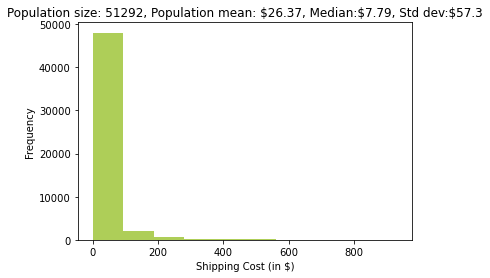

In [9]:
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(superstore[['shipping_cost']],color='#AECE58')
ax.set_title(f"Population size: {length}, Population mean: ${pop_mean}, Median:${pop_median}, Std dev:${pop_std_dev}")
ax.set_xlabel('Shipping Cost (in $)')
ax.set_ylabel('Frequency')

### Sampling and Central Limit Theorem

###### Getting information about the entire population might be difficult in most cases
* We can sample few records from the population
* Need to figure out the means to get most accurate results with lesser samples

### Sample statistic: Mean
* This can be found by plpotting the mean of each of the samples (sampling distribution)
* The mean of the sampling distribution would be the estimate of population mean

In [10]:
# Function to get sampling distribution of means 
def sampling_distribution_mean(no_samples,size):
    sample_distribution_mean=[]
    for i in range(0,no_samples):
        sample_distribution_mean.append(round(sum(rnd.sample(list(superstore['shipping_cost']),size))/len(rnd.sample(list(superstore['shipping_cost']),size)),0))
    return(sample_distribution_mean)

### Increasing the sample count

Sample size 50 is 0.0975% of the population is selected as sample
Sample's standard deviation from the sampling distribution of means is called Standard Error


Text(0, 0.5, 'Frequency')

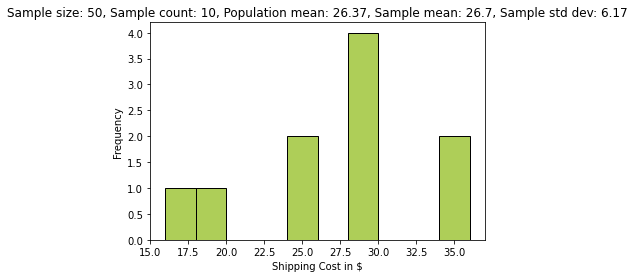

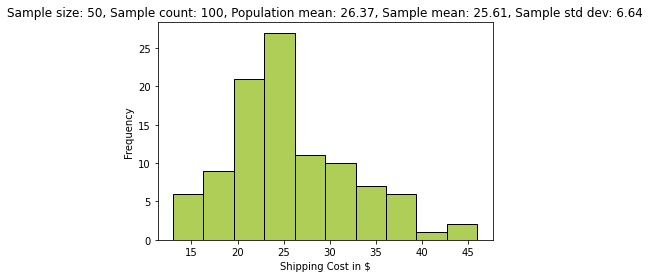

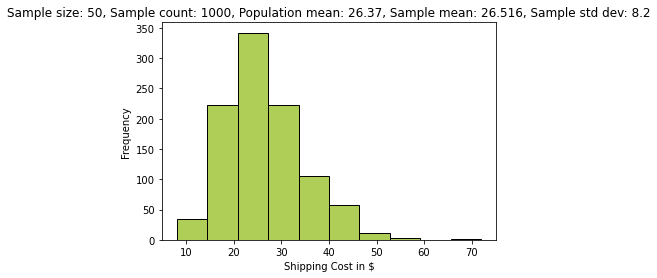

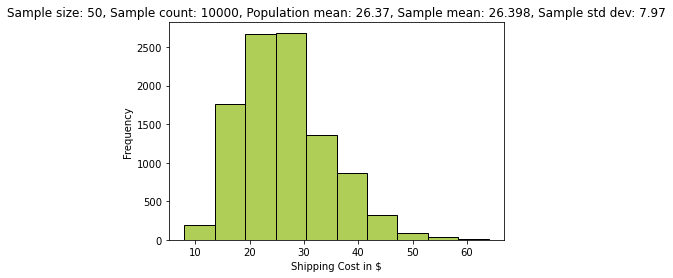

In [11]:
# Plotting with 10 samples and 50 sample size
no_samples=10
size=50
sampling_dist=sampling_distribution_mean(no_samples,size)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,color='#AECE58',edgecolor='black')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population mean: {pop_mean}, Sample mean: {round(sum(sampling_dist)/len(sampling_dist),3)}, Sample std dev: {std_dev_function(sampling_dist)[1]}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')
print(f"Sample size {size} is {round(size*100/length,4)}% of the population is selected as sample")
print(f"Sample's standard deviation from the sampling distribution of means is called Standard Error")

# Plotting with 100 samples and 50 sample size
no_samples=100
size=50
sampling_dist=sampling_distribution_mean(no_samples,size)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,color='#AECE58',edgecolor='black')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population mean: {pop_mean}, Sample mean: {round(sum(sampling_dist)/len(sampling_dist),3)}, Sample std dev: {std_dev_function(sampling_dist)[1]}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')

# Plotting with 1000 samples and 50 sample size
no_samples=1000
size=50
sampling_dist=sampling_distribution_mean(no_samples,size)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,color='#AECE58',edgecolor='black')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population mean: {pop_mean}, Sample mean: {round(sum(sampling_dist)/len(sampling_dist),3)}, Sample std dev: {std_dev_function(sampling_dist)[1]}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')

# Plotting with 10,000 samples and 50 sample size
no_samples=10_000
size=50
sampling_dist=sampling_distribution_mean(no_samples,size)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,color='#AECE58',edgecolor='black')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population mean: {pop_mean}, Sample mean: {round(sum(sampling_dist)/len(sampling_dist),3)}, Sample std dev: {std_dev_function(sampling_dist)[1]}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')


### Increasing the sample size

Sample size 50 is 0.0975% of the population is selected as sample
Sample size 100 is 0.195% of the population is selected as sample
Sample size 500 is 0.9748% of the population is selected as sample
Sample's standard deviation from the sampling distribution of means is called Standard Error


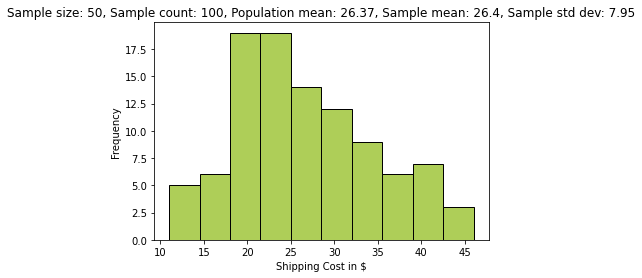

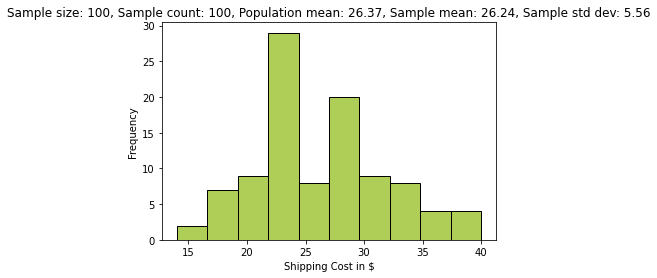

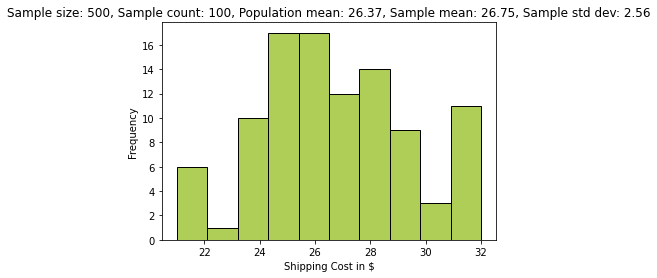

In [12]:
# Plotting with 100 sample count and 50 sample size
no_samples=100
size=50
sampling_dist=sampling_distribution_mean(no_samples,size)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,color='#AECE58',edgecolor='black')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population mean: {pop_mean}, Sample mean: {round(sum(sampling_dist)/len(sampling_dist),3)}, Sample std dev: {std_dev_function(sampling_dist)[1]}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')
print(f"Sample size {size} is {round(size*100/length,4)}% of the population is selected as sample")

# Plotting with 100 sample count and 100 sample size
no_samples=100
size=100
sampling_dist=sampling_distribution_mean(no_samples,size)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,color='#AECE58',edgecolor='black')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population mean: {pop_mean}, Sample mean: {round(sum(sampling_dist)/len(sampling_dist),3)}, Sample std dev: {std_dev_function(sampling_dist)[1]}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')
print(f"Sample size {size} is {round(size*100/length,4)}% of the population is selected as sample")

# Plotting with 100 sample count and 500 sample size
no_samples=100
size=500
sampling_dist=sampling_distribution_mean(no_samples,size)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,color='#AECE58',edgecolor='black')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population mean: {pop_mean}, Sample mean: {round(sum(sampling_dist)/len(sampling_dist),3)}, Sample std dev: {std_dev_function(sampling_dist)[1]}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')
print(f"Sample size {size} is {round(size*100/length,4)}% of the population is selected as sample")
print(f"Sample's standard deviation from the sampling distribution of means is called Standard Error")

### Report: Observation for CLT with means

1) Increasing number of samples makes the normal curve very smooth

2) A sample size of close to 1% of population gives estimates closer to population mean and normal curve with slightly lesser deviation in this case (this cannot be assured for every scenario)

3) Increasing sample count in this example improvises the estimate of predicting population mean, but this might not always be the case

4) Sample size of 10% might not always be available, if available it's better not to go over 1000 sample size 

link:https://tools4dev.org/resources/how-to-choose-a-sample-size/#:~:text=A%20good%20maximum%20sample%20size%20is%20usually%20around%2010%25%20of,the%20maximum%20would%20be%201000.

5) IMPORTANT: In real world, as sampling might be expensive. There is no "correct" number of samples to use. Usually the rule is to use the smallest number possible that yields a noise level that is acceptable to you.

However, reducing the sample size might lead to sample bias and improper estimates. So, it's always better to compromise on the number of samples provided they do not produce too much of noise and better estimates


6) IMPORTANT: Sample size of 50 with fixed sample count makes the distribution normal

### Sample statistic - Standard deviation
* Plot the standard deviation of all sample standard deviations (sampling distribution)
* Finding the mean of them would give an estimate of the population standard deviation, there's some standard error involved while prediction

In [13]:
# Function to get sampling distribution of standard deviation
def sampling_distribution_std_dev(no_samples,size):
    sample_distribution_std_dev=[]
    for i in range(0,no_samples):
        sample_distribution_std_dev.append(round(std_dev_function(list(superstore['shipping_cost'].sample(n=size)))[1],0))
    return(sample_distribution_std_dev)

### Increasing the sample count

Sample size 50 is 0.0975% of the population is selected as sample


Text(0, 0.5, 'Frequency')

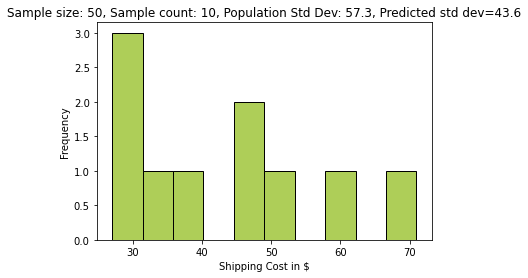

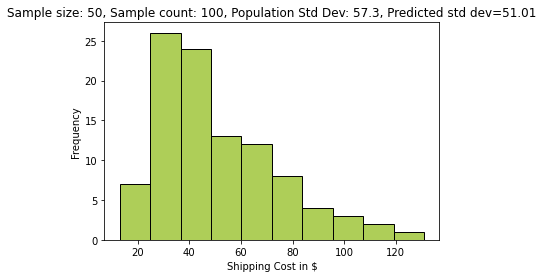

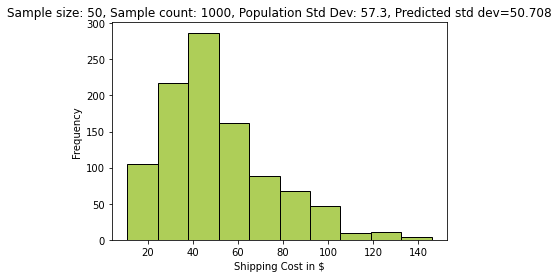

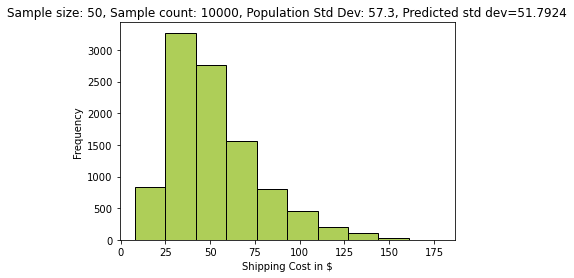

In [14]:
# Plotting with 10 samples and 50 sample size
no_samples=10
size=50
sampling_dist=sampling_distribution_std_dev(no_samples,size)
sample_std_dev=std_dev_function(sampling_distribution_std_dev(no_samples,size))[1]
est_pop_std_dev=sum(sampling_dist)/len(sampling_dist)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,edgecolor='black',color='#AECE58')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population Std Dev: {pop_std_dev}, Predicted std dev={est_pop_std_dev}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')
print(f"Sample size {size} is {round(size*100/length,4)}% of the population is selected as sample")

# Plotting with 100 samples and 50 sample size
no_samples=100
size=50
sampling_dist=sampling_distribution_std_dev(no_samples,size)
sample_std_dev=std_dev_function(sampling_distribution_std_dev(no_samples,size))[1]
est_pop_std_dev=sum(sampling_dist)/len(sampling_dist)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,edgecolor='black',color='#AECE58')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population Std Dev: {pop_std_dev}, Predicted std dev={est_pop_std_dev}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')

# Plotting with 1000 samples and 50 sample size
no_samples=1000
size=50
sampling_dist=sampling_distribution_std_dev(no_samples,size)
sample_std_dev=std_dev_function(sampling_distribution_std_dev(no_samples,size))[1]
est_pop_std_dev=sum(sampling_dist)/len(sampling_dist)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,edgecolor='black',color='#AECE58')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population Std Dev: {pop_std_dev}, Predicted std dev={est_pop_std_dev}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')

# Plotting with 10,000 samples and 50 sample size
no_samples=10_000
size=50
sampling_dist=sampling_distribution_std_dev(no_samples,size)
sample_std_dev=std_dev_function(sampling_distribution_std_dev(no_samples,size))[1]
std_error=round(sample_std_dev/((size)**(1/2)),2)
est_pop_std_dev=sum(sampling_dist)/len(sampling_dist)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,edgecolor='black',color='#AECE58')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population Std Dev: {pop_std_dev}, Predicted std dev={est_pop_std_dev}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')

### Increasing the sample size

Sample size 50 is 0.0975% of the population is selected as sample
Sample size 100 is 0.195% of the population is selected as sample
Sample size 500 is 0.9748% of the population is selected as sample


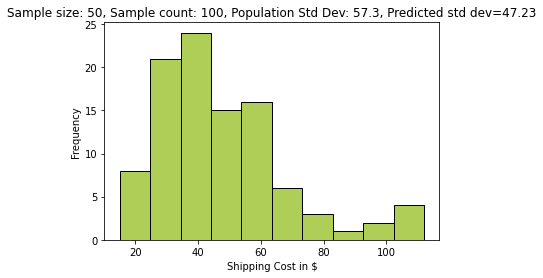

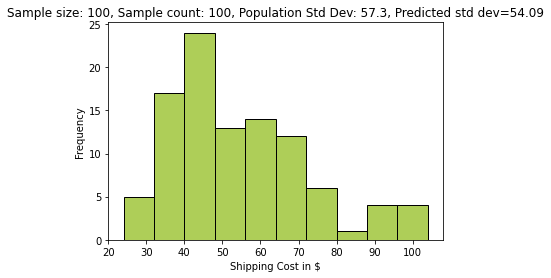

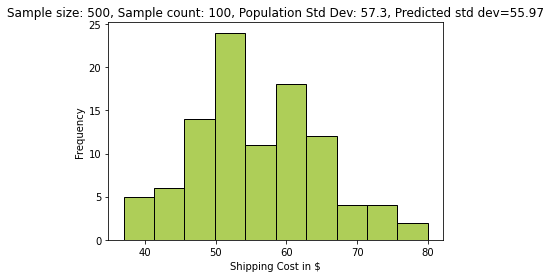

In [15]:
# Plotting with 100 sample count and 50 sample size
no_samples=100
size=50
sampling_dist=sampling_distribution_std_dev(no_samples,size)
sample_std_dev=std_dev_function(sampling_distribution_std_dev(no_samples,size))[1]
est_pop_std_dev=sum(sampling_dist)/len(sampling_dist)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,edgecolor='black',color='#AECE58')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population Std Dev: {pop_std_dev}, Predicted std dev={est_pop_std_dev}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')
print(f"Sample size {size} is {round(size*100/length,4)}% of the population is selected as sample")

# Plotting with 100 sample count and 100 sample size
no_samples=100
size=100
sampling_dist=sampling_distribution_std_dev(no_samples,size)
sample_std_dev=std_dev_function(sampling_distribution_std_dev(no_samples,size))[1]
est_pop_std_dev=sum(sampling_dist)/len(sampling_dist)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,edgecolor='black',color='#AECE58')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population Std Dev: {pop_std_dev}, Predicted std dev={est_pop_std_dev}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')
print(f"Sample size {size} is {round(size*100/length,4)}% of the population is selected as sample")

# Plotting with 100 sample count and 500 sample size
no_samples=100
size=500
sampling_dist=sampling_distribution_std_dev(no_samples,size)
sample_std_dev=std_dev_function(sampling_distribution_std_dev(no_samples,size))[1]
est_pop_std_dev=sum(sampling_dist)/len(sampling_dist)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,edgecolor='black',color='#AECE58')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population Std Dev: {pop_std_dev}, Predicted std dev={est_pop_std_dev}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')
print(f"Sample size {size} is {round(size*100/length,4)}% of the population is selected as sample")

### Report: Observation for CLT with standard deviation

INCREASING SAMPLE COUNT:

1) Standard deviation of sampling distribution cannot accurately predict standard deviation of population with sample size of 50 as there is standard error that oocurs with sampling 

INCREASING SAMPLE SIZE:

2) More the sample size n, lesser is the standard error

3) Hence, when the sample size increases, the predicted std deviation becomes closer to the population standrad deviation

4) IMPORTANT: Sample size of 500 with fixed sample count makes the distribution normal

### Sample Statistics - Median
* This can be found by plpotting the median of each of the samples (sampling distribution)
* The mean of the sampling distribution would be the estimate of population median

In [16]:
# Function to get sampling distribution of median
def sampling_distribution_median(no_samples,size):
    sample_distribution_median=[]
    for i in range(0,no_samples):
        sample_distribution_median.append(superstore['shipping_cost'].sample(n=size).median())
    return(sample_distribution_median)

### Increasing sample count

Sample size 50 is 0.0975% of the population is selected as sample


Text(0, 0.5, 'Frequency')

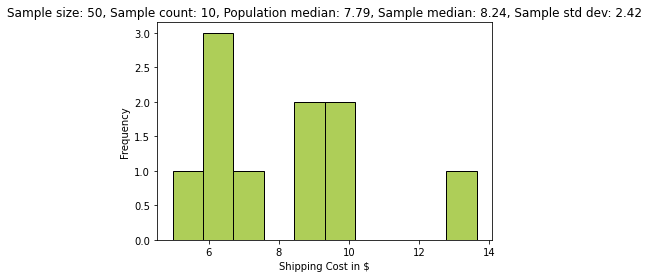

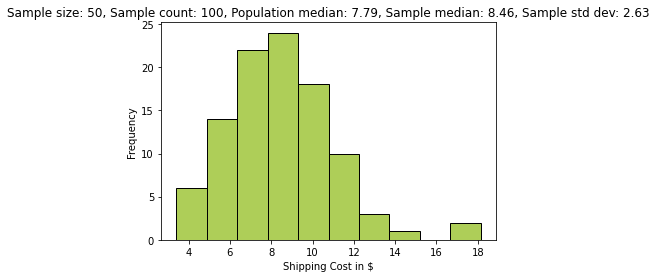

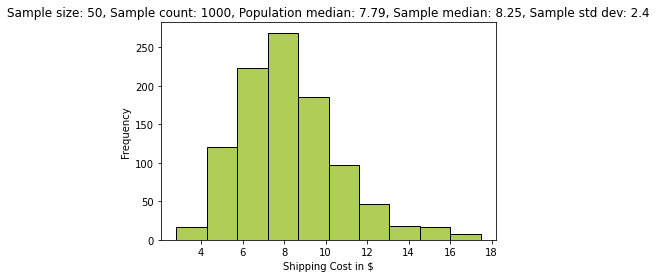

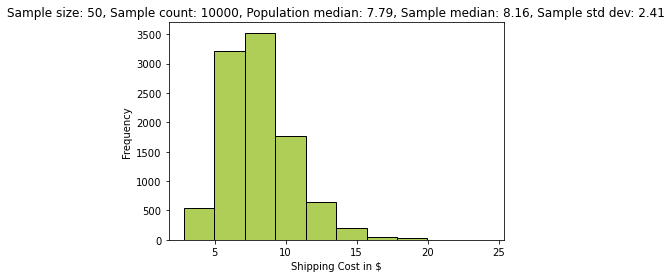

In [316]:
# Plotting with 10 samples and 50 sample size
no_samples=10
size=50
sampling_dist=sampling_distribution_median(no_samples,size)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,color='#AECE58',edgecolor='black')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population median: {pop_median}, Sample median: {round(sum(sampling_dist)/len(sampling_dist),3)}, Sample std dev: {std_dev_function(sampling_dist)[1]}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')
print(f"Sample size {size} is {round(size*100/length,4)}% of the population is selected as sample")

# Plotting with 100 samples and 50 sample size
no_samples=100
size=50
sampling_dist=sampling_distribution_median(no_samples,size)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,color='#AECE58',edgecolor='black')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population median: {pop_median}, Sample median: {round(sum(sampling_dist)/len(sampling_dist),2)}, Sample std dev: {std_dev_function(sampling_dist)[1]}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')

# Plotting with 1000 samples and 50 sample size
no_samples=1000
size=50
sampling_dist=sampling_distribution_median(no_samples,size)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,color='#AECE58',edgecolor='black')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population median: {pop_median}, Sample median: {round(sum(sampling_dist)/len(sampling_dist),2)}, Sample std dev: {std_dev_function(sampling_dist)[1]}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')

# Plotting with 10,000 samples and 50 sample size
no_samples=10_000
size=50
sampling_dist=sampling_distribution_median(no_samples,size)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,color='#AECE58',edgecolor='black')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population median: {pop_median}, Sample median: {round(sum(sampling_dist)/len(sampling_dist),2)}, Sample std dev: {std_dev_function(sampling_dist)[1]}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')


### Increasing sample size

Sample size 50 is 0.0975% of the population is selected as sample
Sample size 100 is 0.195% of the population is selected as sample
Sample size 500 is 0.9748% of the population is selected as sample


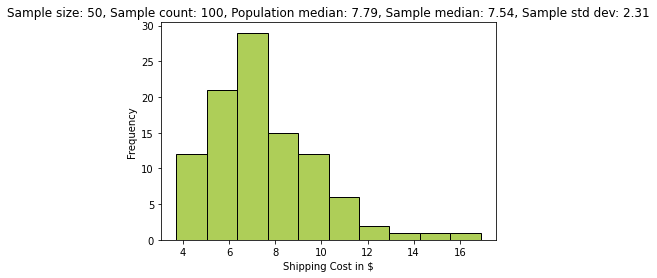

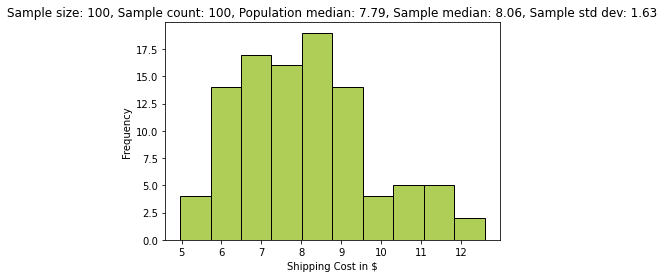

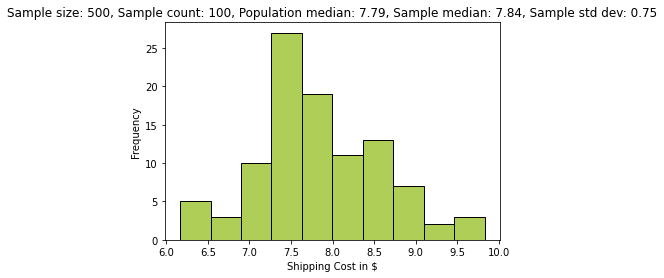

In [315]:
# Plotting with 100 sample count and 50 sample size
no_samples=100
size=50
sampling_dist=sampling_distribution_median(no_samples,size)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,color='#AECE58',edgecolor='black')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population median: {pop_median}, Sample median: {round(sum(sampling_dist)/len(sampling_dist),2)}, Sample std dev: {std_dev_function(sampling_dist)[1]}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')
print(f"Sample size {size} is {round(size*100/length,4)}% of the population is selected as sample")

# Plotting with 100 sample count and 100 sample size
no_samples=100
size=100
sampling_dist=sampling_distribution_median(no_samples,size)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,color='#AECE58',edgecolor='black')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population median: {pop_median}, Sample median: {round(sum(sampling_dist)/len(sampling_dist),2)}, Sample std dev: {std_dev_function(sampling_dist)[1]}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')
print(f"Sample size {size} is {round(size*100/length,4)}% of the population is selected as sample")

# Plotting with 100 sample count and 500 sample size
no_samples=100
size=500
sampling_dist=sampling_distribution_median(no_samples,size)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,color='#AECE58',edgecolor='black')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population median: {pop_median}, Sample median: {round(sum(sampling_dist)/len(sampling_dist),2)}, Sample std dev: {std_dev_function(sampling_dist)[1]}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')
print(f"Sample size {size} is {round(size*100/length,4)}% of the population is selected as sample")

### Report: Observation for CLT with standard deviation

1) Prediction of median remains similar to that of predicting median

2) As the number of samples increases, the sampling distribution becomes a narrow normal distribution with lesser std deviation

4) IMPORTANT: Sample size of 500 with fixed sample count makes the distribution normal

### Report: CLT on various probability distributions

1) Central Limit theorem works on any distribution the same way as it states only about the sampling distribution
and nothing on the population distribution

2) It works the same way for normal distribution

3) One exception is that the population variance should be finite

Link: https://statisticsbyjim.com/basics/central-limit-theorem/

Text(0, 0.5, 'Frequency')

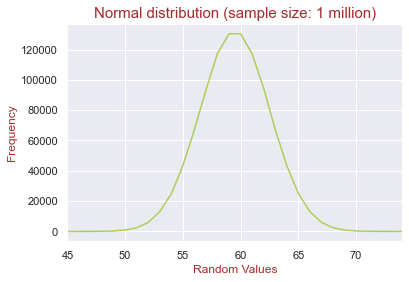

In [347]:
mean=60
sigma=3
rnd.seed(0)
normal_samples_very_large=[int((rnd.gauss(mean,sigma))) for i in range(0,1_000_000)]
value_very_large,frequency_very_large=np.unique(normal_samples_very_large,return_counts=True)
a=sns.lineplot(x=value_very_large,y=frequency_very_large,color='#AECE58')
sns.set_theme(font_scale=1)
a.set_title('Normal distribution (sample size: 1 million)',fontsize='15',color='brown')
a.set_xlim((min(value_very_large),max(value_very_large)))
a.set_xlabel('Random Values',fontsize='12',color='brown')
a.set_ylabel('Frequency',fontsize='12',color='brown')


Sample size 50 is 0.0975% of the population is selected as sample


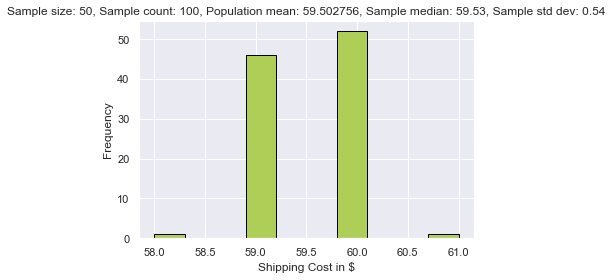

In [355]:
no_samples=100
size=50
sampling_dist=sampling_distribution_normal(no_samples,size)
fig, ax = plt.pyplot.subplots(1, 1)
ax.hist(sampling_dist,color='#AECE58',edgecolor='black')
ax.set_title(f"Sample size: {size}, Sample count: {no_samples}, Population mean: {sum(normal_samples_very_large)/len(normal_samples_very_large)}, Sample median: {round(sum(sampling_dist)/len(sampling_dist),2)}, Sample std dev: {std_dev_function(sampling_dist)[1]}")
ax.set_xlabel('Shipping Cost in $')
ax.set_ylabel('Frequency')
print(f"Sample size {size} is {round(size*100/length,4)}% of the population is selected as sample")

### Report - Other observations

For a fixed sample count of 100, below are the sample sizes where the distributions become normal:

1) Mean: Sample size = 50

2) Median: Sample size = 100

3) Std deviation: Sample size = 500
    
On ranking for this prticular example, Mean requires the minimum sample size in order to reach a normal distribution when estimating using random sampling.

# Collation of the entired markdowns to a report:
(However, see the above for detailed results)

##### Describe which distributions and parameters you used for this assignment.

I used a right skewed distribution in this assignment

##### 1) What were the results? What inferences were you able to make? Did you notice anything unusual that needed further exploration or research to explain?


There was always a small deviation in terms of the predicted population parameters.
Can research and explore on stratified sampling in future rather than random sampling.




##### 2) Some possible topics to discuss in your report based on the results of your experiments (feel free to discuss other topics):
##### o What is a good compromise between the number of samples and the sample size? In the real world (such as professional polling services), it is expensive to do sampling. But you still want the most accurate estimates.


Sample count is always a good compromise as in real time scenario, the sampling cost is high.
It is because close to accurate estimates to population parameters could be made with lesser sample counts sometimes.



##### o Which population probability distributions are more challenging to estimate their parameters with random sampling? Given what the Central Limit Theorem says about the distributions of the sample statistics, would a normally distributed population be easiest? Would other distributions be harder to make good parameter estimates? If so, why?


CLT applies for all kinds of distributions and not necessarily normal distribution alone.
However, the distribution should have a finite variance in order to plot sampling distribution.


##### o From the charts in the March 4th set of lecture notes, it appears that estimating the standard deviation parameter is more challenging than 
##### estimating the population mean and median. Is that generally true for all population distributions? If so, why?


Standard deviation distribution was harger to estimate as there always exists some standard error because of sampling.


##### o For a fixed sample count, what sample sizes are required for the sample distributions to approach normal for each parameter estimation? Is it possible to rank the parameters by the required sample sizes when estimating using random sampling

For this example, mean is found to be estimated better with fixed sample count and varying the sample sizes compared to median and standard deviation.